X.shape torch.Size([1000, 10, 1])
X tensor([[[40.],
         [15.],
         [92.],
         ...,
         [37.],
         [94.],
         [ 8.]],

        [[36.],
         [47.],
         [84.],
         ...,
         [87.],
         [59.],
         [71.]],

        [[ 2.],
         [51.],
         [26.],
         ...,
         [30.],
         [45.],
         [91.]],

        ...,

        [[19.],
         [18.],
         [50.],
         ...,
         [33.],
         [24.],
         [61.]],

        [[27.],
         [92.],
         [16.],
         ...,
         [83.],
         [97.],
         [62.]],

        [[25.],
         [99.],
         [59.],
         ...,
         [19.],
         [78.],
         [17.]]])
y.shape torch.Size([1000, 1])
y tensor([[ 8.],
        [71.],
        [91.],
        [25.],
        [ 6.],
        [18.],
        [58.],
        [81.],
        [40.],
        [50.],
        [25.],
        [71.],
        [25.],
        [11.],
        [13.],
        [88.],
      

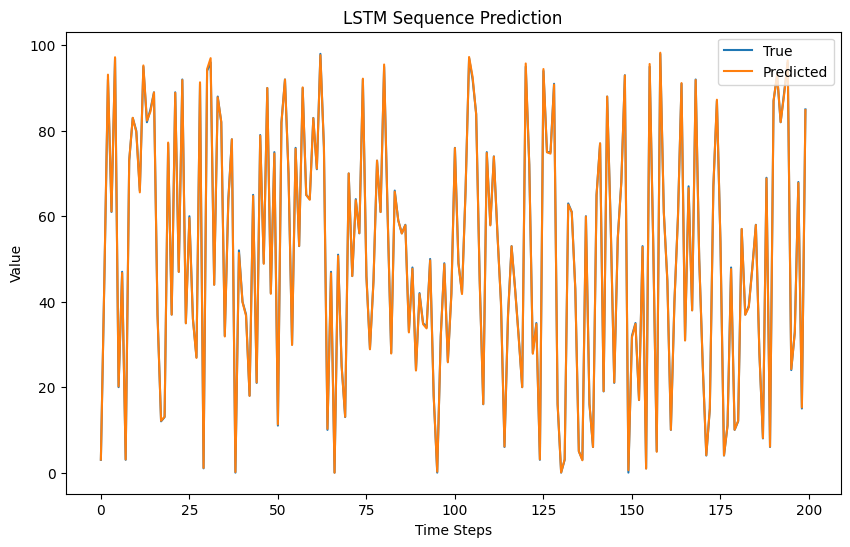

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


# Generate example data
def generate_data(num_samples, sequence_length):
    X = torch.randint(0, 100, (num_samples, sequence_length, 1), dtype=torch.float32)
    y = X[:, -1, :]  # The target is the last element of the sequence
    print(f"X.shape", X.shape)
    print(f"X", X)
    print(f"y.shape", y.shape)
    print(f"y", y)

    return X, y


# LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])  # Only use the last time step's output
        return output


# Parameters
input_size = 1
hidden_size = 64
output_size = 1
num_epochs = 100
learning_rate = 0.01
sequence_length = 10
batch_size = 64

# Prepare data
X_train, y_train = generate_data(1000, sequence_length)
X_test, y_test = generate_data(200, sequence_length)

# Encapsulate data into TensorDataset and DataLoader
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

# Create model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    total_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    average_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}")

# Make predictions
model.eval()
with torch.no_grad():
    X_test = X_test.view(-1, sequence_length, input_size)
    y_pred = model(X_test)

# Display the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.view(-1).numpy(), label="True")
plt.plot(y_pred.view(-1).numpy(), label="Predicted")
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("LSTM Sequence Prediction")
plt.show()
